# Import 

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import phik

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

# Data Loading

In [2]:
data = 'https://raw.githubusercontent.com/JunTheCoder62/Feed/refs/heads/main/stroke_prediction_dataset.csv'
df = pd.read_csv(data)
df

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",NaN,No Stroke
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke


Tahapan ini dimaksudkan untuk menload data yang akan digunakn dalam model

# EDA

In [3]:
df = df.drop(['Patient ID', 'Patient Name'], axis = 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietar

## Handilng Missing Value

In [4]:
df.isna().sum()

Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

terdapat 2500 missing value

In [5]:
df = df.dropna(axis=1)

Dropna digunakan untuk menghilangkan/menghapus data yang kosong.

In [6]:
df.isnull().sum()

Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Diagnosis                   0
dtype: int64

## Handling Duplicate

In [7]:
df.duplicated().sum()

0

dalam data tidak ada duplikat sehingga tidak perlu menghaupsnya data.

In [8]:
df.describe(include='object')

,Gender,Marital Status,Work Type,Residence Type,Smoking Status,Alcohol Intake,Physical Activity,Family History of Stroke,Dietary Habits,Blood Pressure Levels,Cholesterol Levels,Diagnosis
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,2,3,4,2,3,4,3,2,7,4458,5952,2
top,Male,Single,Private,Rural,Currently Smokes,Rarely,High,Yes,Paleo,96/70,"HDL: 50, LDL: 185",No Stroke
freq,7622,5156,3863,7529,5011,3821,5060,7592,2192,14,9,7532


Pada perintah df.describe(include='object'), fungsi .describe() digunakan untuk menghasilkan ringkasan statistik dari kolom-kolom dalam DataFrame df. Dengan menambahkan parameter include='object', kita meminta fungsi ini untuk hanya menampilkan ringkasan statistik dari kolom-kolom bertipe objek (biasanya berisi data teks atau kategori)

## Convert Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietar

In [10]:
# df['Work Type'] = df['Work Type'].astype('category')
# df['Gender'] = df['Gender'].astype('category')
# df['Smoking Status'] = df['Gender'].astype('category')
# df['Residence Type'] = df['Residence Type'].astype('category')
# df['Alcohol Intake'] = df['Alcohol Intake'].astype('category')
# df['Physical Activity'] = df['Physical Activity'].astype('category')
# df['Family History of Stroke'] = df['Family History of Stroke'].astype('category')
# df['Dietary Habits'] = df['Dietary Habits'].astype('category')
# df['Blood Pressure Levels'] = df['Blood Pressure Levels'].astype('category')
# df['Cholesterol Levels'] = df['Cholesterol Levels'].astype('category')
# df['Diagnosis'] = df['Diagnosis'].astype('category')

df_category = ['Work Type', 'Gender', 'Smoking Status', 'Residence Type', 
    'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 
    'Dietary Habits', 'Blood Pressure Levels', 'Cholesterol Levels', 'Diagnosis']
df[df_category] = df[df_category].apply(lambda x: x.astype('category'))
df = df.drop('Marital Status', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       15000 non-null  int64   
 1   Gender                    15000 non-null  category
 2   Hypertension              15000 non-null  int64   
 3   Heart Disease             15000 non-null  int64   
 4   Work Type                 15000 non-null  category
 5   Residence Type            15000 non-null  category
 6   Average Glucose Level     15000 non-null  float64 
 7   Body Mass Index (BMI)     15000 non-null  float64 
 8   Smoking Status            15000 non-null  category
 9   Alcohol Intake            15000 non-null  category
 10  Physical Activity         15000 non-null  category
 11  Stroke History            15000 non-null  int64   
 12  Family History of Stroke  15000 non-null  category
 13  Dietary Habits            15000 non-null  cate

pada tahapan ini kita mengkonversi data yang dari obj menjadi categorical agar memory yang digunakan tidak terlalu besar sehingga tidak membebani system yang dijalankan.

# Business Understanding

## Univariate Analysis

Univariate Analysis merupakan tahapan untuk memahami karakteristik dasar dari variable data. seperti distribusi, nilai rata - rata, variasi, dan lain - lain.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       15000 non-null  int64   
 1   Gender                    15000 non-null  category
 2   Hypertension              15000 non-null  int64   
 3   Heart Disease             15000 non-null  int64   
 4   Work Type                 15000 non-null  category
 5   Residence Type            15000 non-null  category
 6   Average Glucose Level     15000 non-null  float64 
 7   Body Mass Index (BMI)     15000 non-null  float64 
 8   Smoking Status            15000 non-null  category
 9   Alcohol Intake            15000 non-null  category
 10  Physical Activity         15000 non-null  category
 11  Stroke History            15000 non-null  int64   
 12  Family History of Stroke  15000 non-null  category
 13  Dietary Habits            15000 non-null  cate

In [12]:
df['Diagnosis'].value_counts(normalize=True)

Diagnosis
No Stroke    0.502133
Stroke       0.497867
Name: proportion, dtype: float64

data yang ada seimbang. tidak perlu balancing data

In [13]:
df[df['Age'] == df['Age'].min()]

,Age,Gender,Hypertension,Heart Disease,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
177,18,Male,0,0,Government Job,Urban,71.12,37.67,Formerly Smoked,Rarely,Low,1,Yes,Pescatarian,6.06,154/67,"HDL: 50, LDL: 117",Stroke
209,18,Male,0,0,Government Job,Urban,108.92,19.42,Formerly Smoked,Social Drinker,High,0,No,Non-Vegetarian,4.84,116/106,"HDL: 34, LDL: 183",No Stroke
235,18,Male,1,0,Private,Urban,91.47,27.27,Formerly Smoked,Never,Moderate,0,Yes,Pescatarian,0.87,141/92,"HDL: 58, LDL: 141",No Stroke
425,18,Male,1,1,Government Job,Urban,73.90,38.21,Formerly Smoked,Frequent Drinker,Moderate,0,Yes,Vegetarian,5.39,171/61,"HDL: 61, LDL: 99",Stroke
469,18,Male,0,1,Government Job,Rural,74.79,21.01,Formerly Smoked,Social Drinker,Moderate,1,No,Gluten-Free,2.48,149/108,"HDL: 49, LDL: 101",Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,18,Male,0,1,Government Job,Urban,184.26,21.84,Currently Smokes,Rarely,Moderate,0,No,Paleo,0.82,172/83,"HDL: 51, LDL: 182",Stroke
14829,18,Male,1,0,Never Worked,Rural,136.44,22.65,Formerly Smoked,Rarely,Moderate,0,No,Vegetarian,8.57,134/71,"HDL: 52, LDL: 110",No Stroke
14875,18,Female,0,1,Government Job,Rural,99.89,37.69,Non-smoker,Rarely,Low,0,No,Non-Vegetarian,7.30,122/106,"HDL: 65, LDL: 100",Stroke
14883,18,Male,1,1,Self-employed,Rural,159.41,32.47,Formerly Smoked,Frequent Drinker,High,0,Yes,Vegan,1.86,163/81,"HDL: 70, LDL: 109",No Stroke


In [14]:
df['Gender'].value_counts()

Gender
Male      7622
Female    7378
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender')

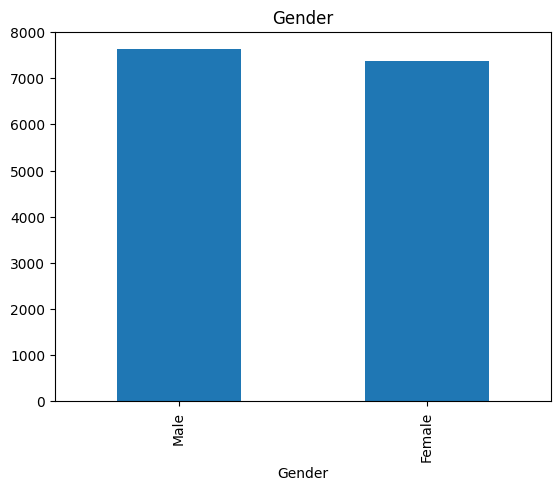

In [15]:
df['Gender'].value_counts().plot(kind='bar')
plt.xticks()
plt.title('Gender')

Male category lebih banyak memiliki Stroke


In [16]:
df['Work Type'].value_counts()

Work Type
Private           3863
Self-employed     3855
Government Job    3710
Never Worked      3572
Name: count, dtype: int64

In [17]:
df.groupby('Work Type')['Diagnosis'].value_counts()

C:\Users\paris\AppData\Local\Temp\ipykernel_33932\752109787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Work Type')['Diagnosis'].value_counts()


Work Type       Diagnosis
Government Job  No Stroke    1858
                Stroke       1852
Never Worked    No Stroke    1807
                Stroke       1765
Private         No Stroke    1968
                Stroke       1895
Self-employed   Stroke       1956
                No Stroke    1899
Name: count, dtype: int64

Data ini menunjukkan jumlah orang berdasarkan jenis pekerjaan dan apakah mereka pernah mengalami stroke atau tidak. Tabel ini tersusun dengan dua kategori utama: Work Type (jenis pekerjaan) dan Diagnosis (apakah mengalami stroke atau tidak)

In [18]:
# Remove Never Worked 
df = df[df['Work Type'] != 'Never Worked']
df['Work Type'].value_counts()

Work Type
Private           3863
Self-employed     3855
Government Job    3710
Never Worked         0
Name: count, dtype: int64

In [19]:
df.groupby('Work Type')['Diagnosis'].value_counts()

C:\Users\paris\AppData\Local\Temp\ipykernel_33932\752109787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Work Type')['Diagnosis'].value_counts()


Work Type       Diagnosis
Government Job  No Stroke    1858
                Stroke       1852
Never Worked    No Stroke       0
                Stroke          0
Private         No Stroke    1968
                Stroke       1895
Self-employed   Stroke       1956
                No Stroke    1899
Name: count, dtype: int64

Data ini menunjukkan jumlah kejadian stroke dan non-stroke berdasarkan jenis pekerjaan melalui pengelompokan data menggunakan groupby dan value_counts

In [20]:
df['Smoking Status'].value_counts()

Smoking Status
Non-smoker          3826
Formerly Smoked     3803
Currently Smokes    3799
Name: count, dtype: int64

<Axes: >

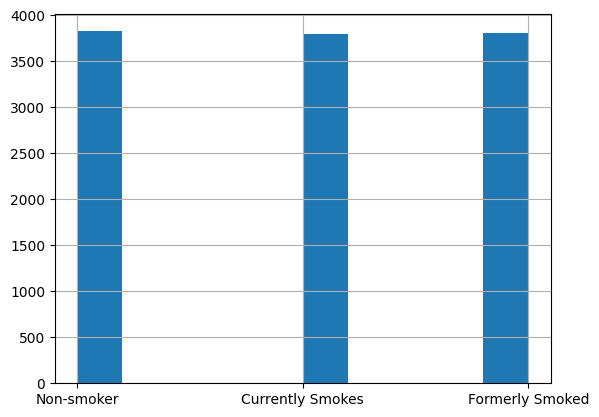

In [21]:
df['Smoking Status'].hist()

<Axes: >

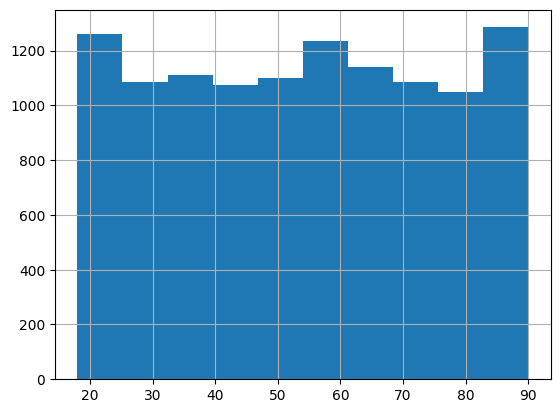

In [22]:
df['Age'].hist()

In [23]:
df['Diagnosis'].value_counts()

Diagnosis
No Stroke    5725
Stroke       5703
Name: count, dtype: int64

Text(0.5, 1.0, 'Stroke')

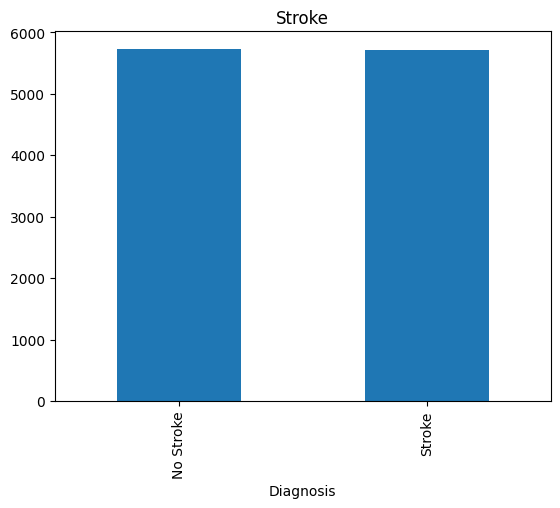

In [24]:
df['Diagnosis'].value_counts().plot(kind='bar')
plt.xticks()
plt.title('Stroke')

<Axes: xlabel='Age', ylabel='Count'>

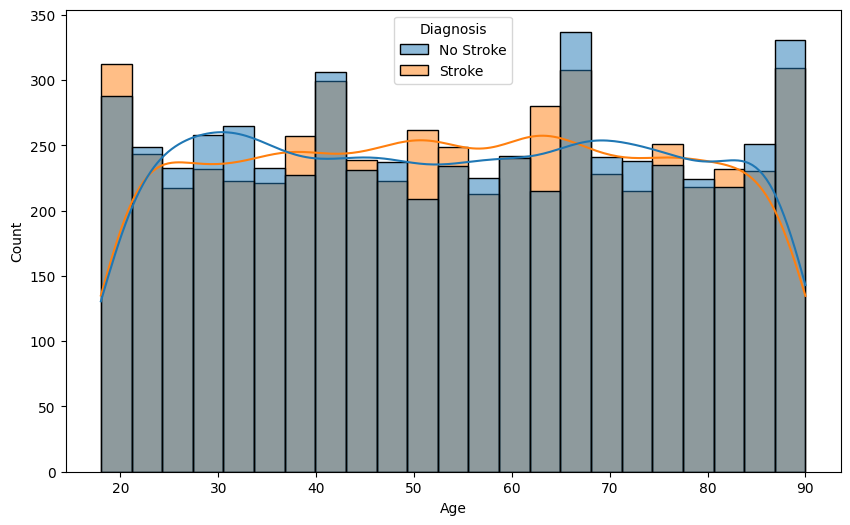

In [25]:
# Distribution between Age and Work Type

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x ='Age', hue='Diagnosis', kde=True)

Gambar Grafik diatas merupakan grafik Distribusi Age vs Diagnosis, dimana umur 20+ memiliki diagnosis stroke paling banyak.

## Multivariate Analysis

Dalam tahpan Multivariate analysis teknik analisis data yang digunakan untuk memahami hubungan antara lebih dari dua variabel secara bersamaan.

C:\Users\paris\AppData\Local\Temp\ipykernel_33932\85966134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot1 = df[['Diagnosis', 'Work Type']].groupby('Work Type').value_counts().reset_index()


Text(0.5, 1.0, 'Stroke and Work Type')

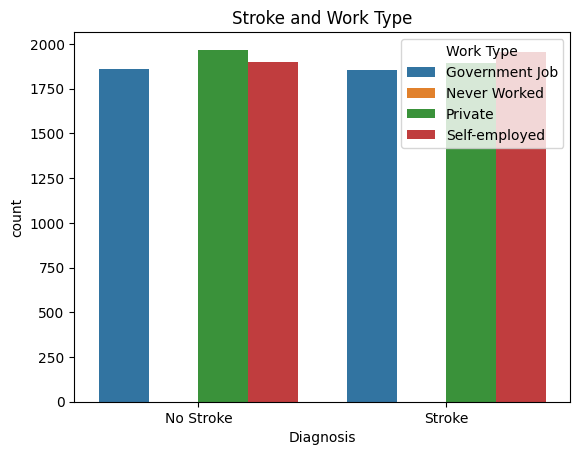

In [26]:
df_plot1 = df[['Diagnosis', 'Work Type']].groupby('Work Type').value_counts().reset_index()
sns.barplot(data=df_plot1, x='Diagnosis', y='count', hue='Work Type')
plt.title('Stroke and Work Type')

Grafik gambar diatas merupak gambar grafik Stroke vs Worktype. dimana dapat dilihat bahwa sektor swasta memiliki diagnosisi terbanyak.

# Features Engineering

Feature engineering adalah proses mengubah data mentah menjadi fitur yang dapat digunakan oleh algoritma machine learning untuk meningkatkan kinerja model. Fitur-fitur ini merupakan variabel yang secara langsung digunakan dalam model untuk memprediksi target atau membuat keputusan.

In [27]:
num_features = ['Age', 'Hypertension', 'Heart Disease', 'Stroke History', 'Stress Levels']
cat_features = ['Gender', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits', 'Blood Pressure Levels', 'Cholesterol Levels', 'Diagnosis']

num_features dan cat_features merupakan pemisahan data anta Numerical data dan Categorical data yang akan digunakan untuk menentukan fitur.

In [28]:
features = cat_features[0]

counter = df[features].value_counts()
persen = 100 * df[features].value_counts(normalize = True)
temp = pd.DataFrame({'data': counter, 'persentase': persen.round(1)})
print(temp)

        data  persentase
Gender                  
Male    5838        51.1
Female  5590        48.9


fitur pertama merupakan fitur gender, dapat dilihat bahwa pembagian data antra gender male dan female.

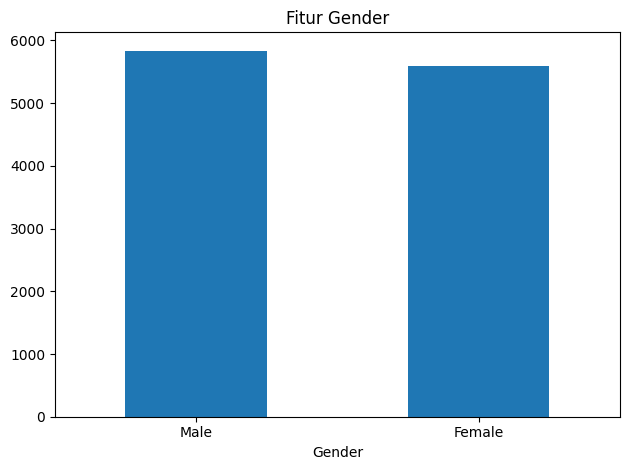

In [29]:
counter.plot(kind='bar', title="Fitur " + features);

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

diatas merupakan grafik fitur dimana perbandingan fitur gender male dan female

In [30]:
features = cat_features[1]

counter = df[features].value_counts()
persen = 100 * df[features].value_counts(normalize = True)
temp = pd.DataFrame({'data': counter, 'persentase': persen.round(1)})
print(temp)

                data  persentase
Work Type                       
Private         3863        33.8
Self-employed   3855        33.7
Government Job  3710        32.5
Never Worked       0         0.0


sama dengan fitur gender, fitur yang digunakan kali ini merupakan fitur Work Type.

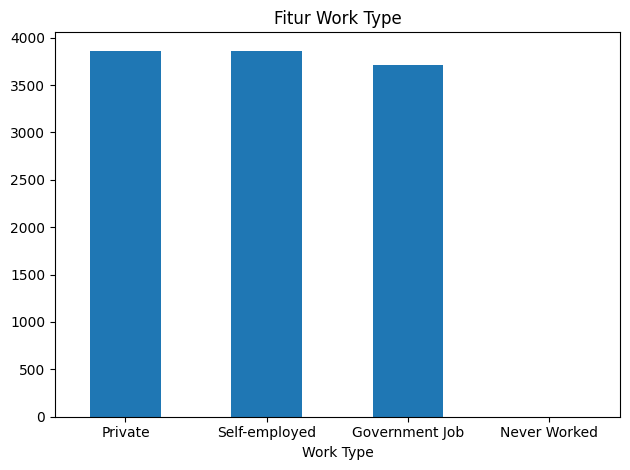

In [31]:
counter.plot(kind='bar', title="Fitur " + features);

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Dapat dilihat fitur work type memiliki 4 data, yaitu Private, self-employed, goverment job, dan Never worked. Kita drop Never Worked karena dikategorian tidak Bekerja. sehingga tidak relevan dengan fitur ini.

In [32]:
df.isna().sum()

Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Diagnosis                   0
dtype: int64

In [33]:
df.shape

(11428, 18)

diatas merupakan tahapan data setelah didrop difilter dan dan EDA

In [34]:
df.dropna(inplace=True)

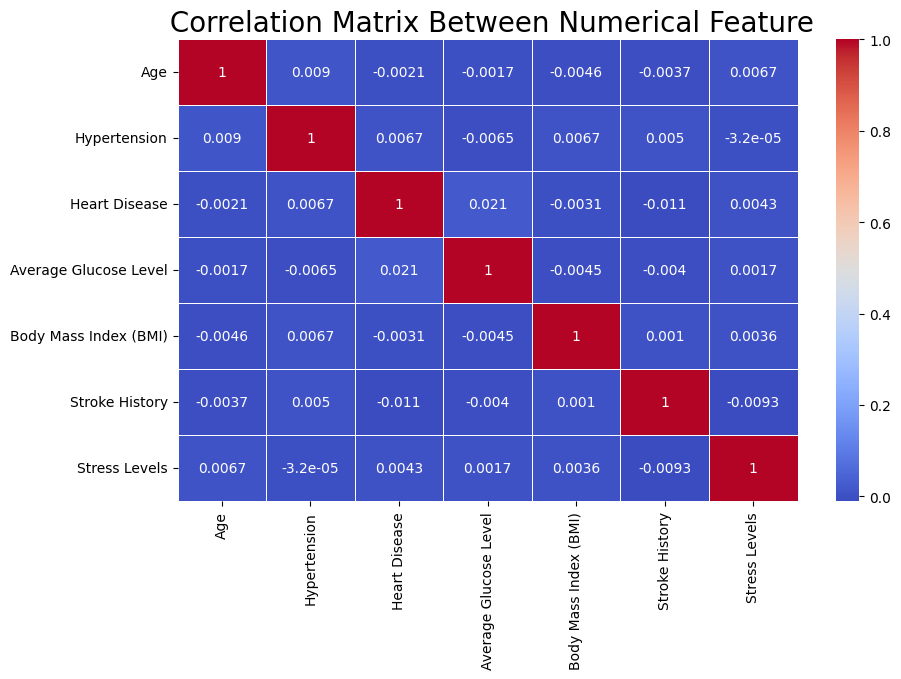

In [35]:
# Correlation Matrix

df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(" Correlation Matrix Between Numerical Feature", size = 20)
plt.show()

Diatas merupak Matrik Korelasi sebelum diubah ke Numerical.

# Data Preperation 

Data preparation adalah proses menyiapkan data mentah untuk digunakan dalam analisis atau pelatihan model machine learning. Ini adalah langkah penting dalam pipeline machine learning, karena kualitas data sangat memengaruhi performa model. Proses data preparation melibatkan berbagai langkah untuk memastikan bahwa data yang akan digunakan lengkap, bersih, dan dalam format yang sesuai

## Encoder Data

Dalam tahapan encoding sering kali dilakukan setelah data cleaning dan sebelum normalisasi atau feature scaling dalam pipeline persiapan data. Encoding sangat penting dalam data preparation karena banyak algoritma machine learning, seperti regresi linier atau algoritma berbasis matriks, hanya bisa bekerja dengan data numerik

In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
# Using OnehotEncoder

# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# df_encoder = ohe.fit_transform(df[['Gender','Diagnosis', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits']])
# df_encoder

encoder dapat menggunakan beberapa teknik seperti menggunakan OneHotEncoder. OneHotEncoder merupakan teknik mengubah data Categorical menjadi Numerical dengan memisahkan data menjadi beberapa Categori, diamana data akan diubah menjadi angak 0 atau 1

In [38]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Diagnosis'] = encoder.fit_transform(df['Diagnosis'])
df['Work Type'] = encoder.fit_transform(df['Residence Type'])
df['Smoking Status'] = encoder.fit_transform(df['Smoking Status'])
df['Alcohol Intake'] = encoder.fit_transform(df['Alcohol Intake'])
df['Physical Activity'] = encoder.fit_transform(df['Physical Activity'])
df['Family History of Stroke'] = encoder.fit_transform(df['Family History of Stroke'])
df['Dietary Habits'] = encoder.fit_transform(df['Diagnosis'])
df['Residence Type'] = encoder.fit_transform(df['Residence Type'])
df['Blood Pressure Levels'] = encoder.fit_transform(df['Blood Pressure Levels'])
df['Cholesterol Levels'] = encoder.fit_transform(df['Cholesterol Levels'])
df.head()

,Age,Gender,Hypertension,Heart Disease,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,56,1,0,1,0,0,130.91,22.37,2,3,2,0,1,1,3.48,1869,4096,1
1,80,1,0,0,1,1,183.73,32.57,2,1,1,0,0,1,1.73,2179,3602,1
4,51,1,1,1,1,1,177.34,29.06,0,2,1,0,1,1,6.84,1019,3824,1
5,62,0,0,0,1,1,91.60,37.47,0,3,0,0,0,1,4.85,1501,5435,1
6,40,0,1,0,1,1,77.83,28.20,0,1,1,1,0,0,6.38,3642,138,0


Teknik encoder diatas merupak teknik dimana mengubah data Categorical menjadi Numerical. dengan menggunakan LabelEncoder dari library Sklear. LabelEncoder mengubah data menjadi 1, 2, 3, ... tanpa harus memisahkan data, sehingga tetap dalam satu kolom.

In [39]:
# df = pd.get_dummies(df[['Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits', 'Diagnosis']], drop_first=True).astype(int)
# df.head()

Sama seperti OneHotEncoder, mengubah data Categorical Menjadi Numerical dengan nilai 0 atau 1.

In [40]:
# df_enc = pd.concat([df, df_encoder], axis=1).drop(columns=['Gender', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits', 'Blood Pressure Levels', 'Cholesterol Levels'])
# df_enc.head(7)

dalam tahapan ini digunakan hanya untuk nilai data 0 atau 1, dikarenakan data yang diubah akan dibagi menjadi beberapa bagian.

In [41]:
# df_enc.info()

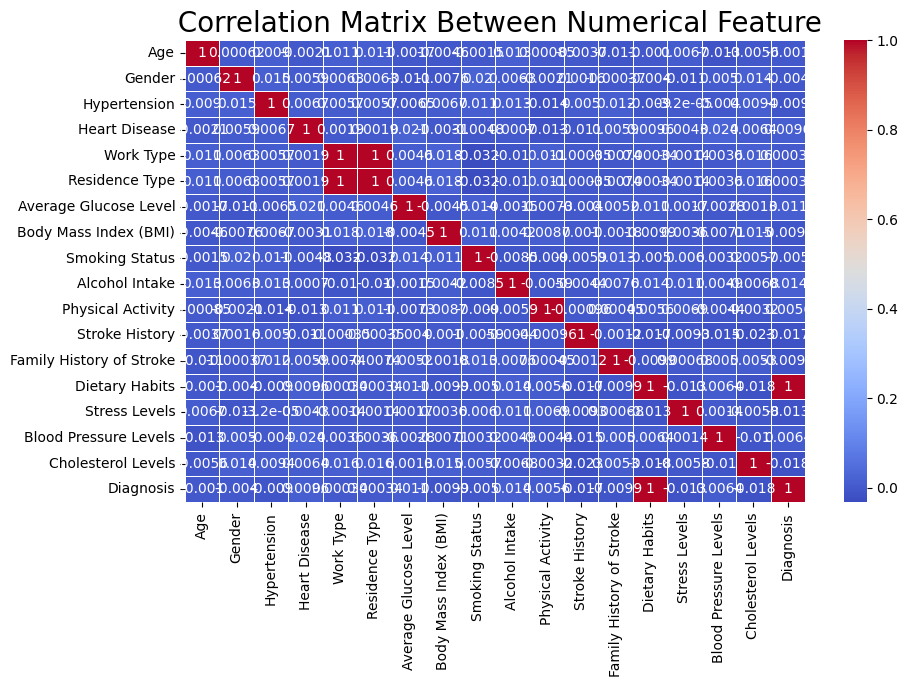

In [42]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(" Correlation Matrix Between Numerical Feature", size = 20)
plt.show()

gambar matiks korelasi diatas merupakan matriks korelasi yang diubah dari categorical menjadi Numerical. Dapat dilihat bahwa fitur Diagnosis dan Dietary Habits dapat digunakan sebagai model.

In [43]:
df.corr()

,Age,Gender,Hypertension,Heart Disease,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
Age,1.000000,0.000623,0.009029,-0.002080,0.010566,0.010566,-0.001666,-0.004579,-0.001480,0.013471,0.000855,-0.003748,-0.010825,-0.001036,0.006679,-0.012824,-0.005556,-0.001036
Gender,0.000623,1.000000,0.014694,0.005929,0.006267,0.006267,-0.011163,-0.007598,0.020403,0.006274,-0.002076,0.001579,-0.000372,-0.003984,-0.010791,0.004970,0.014343,-0.003984
Hypertension,0.009029,0.014694,1.000000,0.006692,0.005745,0.005745,-0.006469,0.006714,0.010990,0.012657,-0.014081,0.004964,0.011632,-0.009026,-0.000032,-0.004006,0.009448,-0.009026
Heart Disease,-0.002080,0.005929,0.006692,1.000000,0.001932,0.001932,0.020839,-0.003052,-0.004824,0.000695,-0.013138,-0.011025,0.005933,0.009628,0.004332,0.024229,0.006400,0.009628
Work Type,0.010566,0.006267,0.005745,0.001932,1.000000,1.000000,0.004647,0.018094,-0.032441,-0.010457,0.010744,-0.000351,-0.007416,0.000338,-0.001407,0.003561,0.015877,0.000338
Residence Type,0.010566,0.006267,0.005745,0.001932,1.000000,1.000000,0.004647,0.018094,-0.032441,-0.010457,0.010744,-0.000351,-0.007416,0.000338,-0.001407,0.003561,0.015877,0.000338
Average Glucose Level,-0.001666,-0.011163,-0.006469,0.020839,0.004647,0.004647,1.000000,-0.004522,0.014000,-0.001454,-0.007270,-0.003983,0.005155,0.010892,0.001700,-0.002787,0.001266,0.010892
Body Mass Index (BMI),-0.004579,-0.007598,0.006714,-0.003052,0.018094,0.018094,-0.004522,1.000000,0.011391,0.004224,0.008685,0.001049,-0.001782,-0.009934,0.003563,-0.007124,0.014659,-0.009934
Smoking Status,-0.001480,0.020403,0.010990,-0.004824,-0.032441,-0.032441,0.014000,0.011391,1.000000,-0.008452,-0.009006,-0.005891,0.013343,-0.005029,0.006044,0.003222,0.005661,-0.005029
Alcohol Intake,0.013471,0.006274,0.012657,0.000695,-0.010457,-0.010457,-0.001454,0.004224,-0.008452,1.000000,-0.005909,-0.004399,0.007584,0.014483,0.010714,0.004865,-0.006798,0.014483


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11428 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       11428 non-null  int64  
 1   Gender                    11428 non-null  int32  
 2   Hypertension              11428 non-null  int64  
 3   Heart Disease             11428 non-null  int64  
 4   Work Type                 11428 non-null  int32  
 5   Residence Type            11428 non-null  int32  
 6   Average Glucose Level     11428 non-null  float64
 7   Body Mass Index (BMI)     11428 non-null  float64
 8   Smoking Status            11428 non-null  int32  
 9   Alcohol Intake            11428 non-null  int32  
 10  Physical Activity         11428 non-null  int32  
 11  Stroke History            11428 non-null  int64  
 12  Family History of Stroke  11428 non-null  int32  
 13  Dietary Habits            11428 non-null  int64  
 14  Stress Leve

In [45]:
# corr = df.corr()
# plt.figure(figsize=(10, 6))
# sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title(" Correlation Matrix Between Numerical Feature", size = 20)
# plt.show()

# Modelling

In [46]:
# scalling
scaler = StandardScaler()

In [47]:
# split data test dan train
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

#  balancing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

Pada tahapan ini data dibagi menjadi train_data dan test_data untuk pemodelan machine learning. dan pada tahapin ini juga kita dapat melihat data overfitting, dimana model terlalu sesui dengan data latih tetapi memiliki kinerja yang buruk.

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9142, 17)
(2286, 17)
(9142,)
(2286,)


diatas merupak data yang akan digunakan untuk train_data dan test_data

In [49]:
print([len(X_train), len(y_train)])
print([len(X_test), len(y_test)])

[9142, 9142]
[2286, 2286]


In [50]:
y_train.value_counts(normalize=True)

Diagnosis
1    0.500109
0    0.499891
Name: proportion, dtype: float64

tahapan diatas adalah untuk menghitung proporsi dari setiap kelas yang ada dalam variabel target y_train

In [51]:
y_test.value_counts(normalize=True)

Diagnosis
0    0.505249
1    0.494751
Name: proportion, dtype: float64

tahapan diatas adalah untuk menghitung proporsi dari setiap kelas yang ada dalam variabel target y_test

In [52]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

import metris yang digunakan dalam data

## Random Forest

In [53]:
# RandomForest

modem_rm = RandomForestClassifier()
modem_rm.fit(X_train, y_train)
predic_rf = modem_rm.predict(X_test)

print("akurasi:", accuracy_score(y_test, predic_rf))
print(classification_report(y_test, predic_rf))

akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      2286
   macro avg       1.00      1.00      1.00      2286
weighted avg       1.00      1.00      1.00      2286



Tahapan di atas menggambarkan proses pelatihan dan evaluasi model klasifikasi menggunakan algoritma Random Forest.

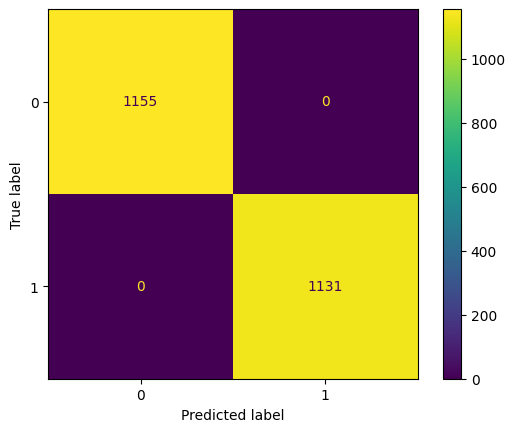

In [54]:
# Confusion Matrix

rm_cm = confusion_matrix(y_test, predic_rf)
rm_cm = metrics.ConfusionMatrixDisplay(confusion_matrix=rm_cm)
rm_cm.plot()

## Decision Tree

In [55]:
# Decision Tree

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
predic_dt = model_dt.predict(X_test)

print("akurasi:", accuracy_score(y_test, predic_dt))
print(classification_report(y_test, predic_dt))

akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      2286
   macro avg       1.00      1.00      1.00      2286
weighted avg       1.00      1.00      1.00      2286



Tahapan di atas menjelaskan proses pelatihan dan evaluasi model klasifikasi menggunakan Decision Tree

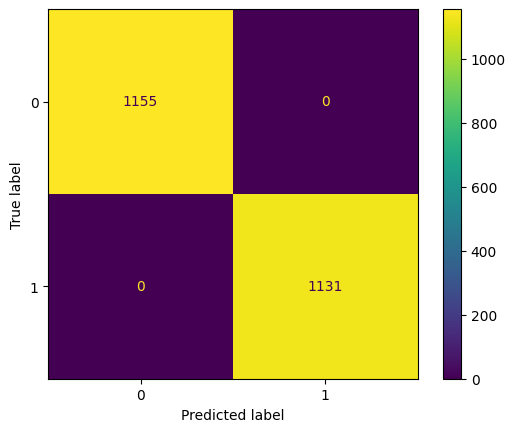

In [56]:
# Confusion Matrix

dt_cm = confusion_matrix(y_test, predic_dt)
dt_cm = metrics.ConfusionMatrixDisplay(confusion_matrix=dt_cm)
dt_cm.plot()

## KNN model

In [57]:
# KNN model

model_knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute', weights='uniform')
model_knn.fit(X_train, y_train)
predic_knn = model_knn.predict(X_test)

print("akurasi:", accuracy_score(y_test, predic_knn))
print(classification_report(y_test, predic_knn))

akurasi: 0.4978127734033246
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1155
           1       0.49      0.49      0.49      1131

    accuracy                           0.50      2286
   macro avg       0.50      0.50      0.50      2286
weighted avg       0.50      0.50      0.50      2286



Tahapan di atas menjelaskan proses pelatihan dan evaluasi model klasifikasi menggunakan K-Nearest Neighbors (KNN)

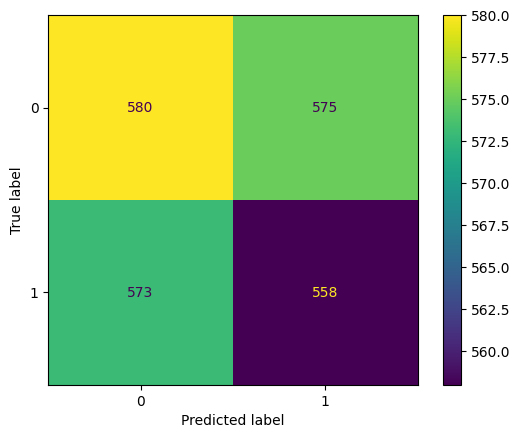

In [58]:
# Confusion Matrix

knn_cm = confusion_matrix(y_test, predic_knn)
knn_cm = metrics.ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_cm.plot()

## AdaBoost

In [59]:
# AdaBoost

model_ab = AdaBoostClassifier(estimator=LogisticRegression(random_state=42),
                              n_estimators=50,
                              random_state=42)
model_ab.fit(X_train, y_train)
predic_ab = model_ab.predict(X_test)

print("akurasi:", accuracy_score(y_test, predic_ab))
print(classification_report(y_test, predic_ab))

akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      2286
   macro avg       1.00      1.00      1.00      2286
weighted avg       1.00      1.00      1.00      2286



C:\Users\paris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\paris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\paris\AppData\Local\Packages\PythonSof

Tahapan di atas menjelaskan proses pelatihan dan evaluasi model klasifikasi menggunakan AdaBoost, dengan Logistic Regression sebagai estimator dasar

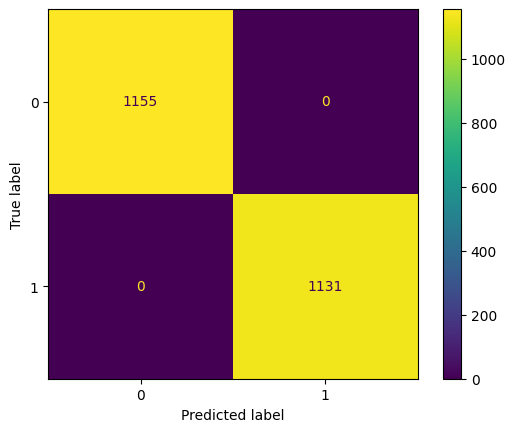

In [60]:
# Confusion Matrix

ab_cm = confusion_matrix(y_test, predic_ab)
ab_cm = metrics.ConfusionMatrixDisplay(confusion_matrix=ab_cm)
ab_cm.plot()

## Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Langkah 1: Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Langkah 2: Menggunakan SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Langkah 3: Menentukan parameter grid untuk KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # Jumlah tetangga terdekat
    'weights': ['uniform', 'distance'],  # Bobot tetangga
    'algorithm': ['brute', 'ball_tree', 'kd_tree', 'auto']  # Algoritma pencarian
}

# Langkah 4: Buat objek KNN
knn = KNeighborsClassifier()

# Langkah 5: Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Langkah 6: Latih model dengan GridSearchCV menggunakan data yang sudah disampling
grid_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan hasil
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Langkah 7: Menggunakan model terbaik untuk prediksi
best_knn = grid_search.best_estimator_
predic_knn_best = best_knn.predict(X_test_scaled)

# Evaluasi model terbaik
print("Akurasi pada test set:", accuracy_score(y_test, predic_knn_best))
print(classification_report(y_test, predic_knn_best))



Best Hyperparameters: {'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'uniform'}
Best Cross-Validation Score: 1.0
Akurasi pada test set: 0.9991251093613298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      2286
   macro avg       1.00      1.00      1.00      2286
weighted avg       1.00      1.00      1.00      2286



Setelah menggunakan hyperparameter tuning akurasi model meningkat dan memiliki akurasi yang lebih tinggi dari KKN model.